In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
from scipy.io import wavfile

In [128]:
t0 = 0
t1 = 0.1 #duty stop time in seconds (also chirp stop time)
t2 = 0.2 #full end time in seconds

f0 = 10000 #freq sweep start
f1 = 20000 #freq sweep stop

samplingRate = 48000 #Sample Rate of Recieving equipment

In [130]:
time_duty = np.arange(t0,t1,1/samplingRate)
time_full = np.arange(t0,t2,1/samplingRate)

(9600, 4800)

In [131]:
chirp = scipy.signal.chirp(time_duty,f0,t1,f1,phi = 90)
chirp_zero = np.append(chirp,np.zeros(int(4*len(time_full)/10)))
chirp_zero = np.append(np.zeros(int(len(time_full)/10)),chirp_zero)
                    

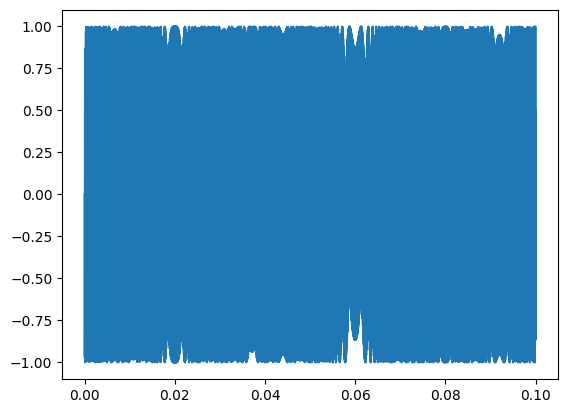

In [132]:
plt.figure()
plt.plot(time_duty,chirp)

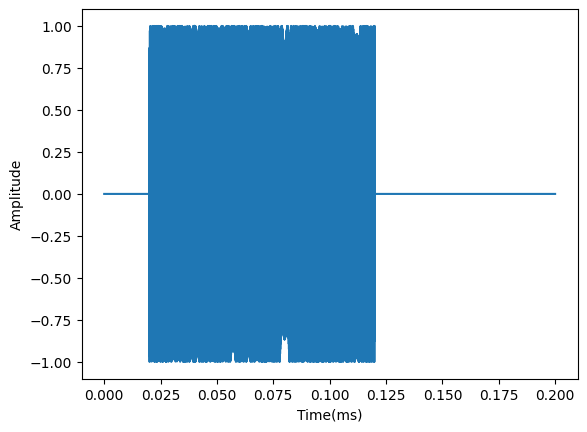

In [144]:
plt.figure()
plt.plot(time_full,chirp_zero)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')
#plt.savefig('RealisticChirp_10Khz_20kHz_100msDuty')

In [135]:
Modulation = np.zeros(len(time_duty))
#Positions of alternating multiple:

#3 "bits" of 1:
S1 = int(3*len(time_duty)/8)
#2 "bits" of -1
S2 = S1+int(2*len(time_duty)/8)
#1 "bit" of 1:
S3 = S2 + int(len(time_duty)/8)
#1 "bit" of 1:
S4 = S3 + int(len(time_duty)/8)

print(time_duty[S1],time_duty[S2],time_duty[S3],time_duty[S4])

0.0375 0.0625 0.075 0.0875


In [136]:
for i in np.arange(len(Modulation)):
    if i<S1:
        Modulation[i] = 1
    if S1<i<S2:
        Modulation[i] = -1
    if S2<i<S3:
        Modulation[i] = 1
    if S3<i<S4:
        Modulation[i] = -1
    if S4<i:
        Modulation[i] = 1

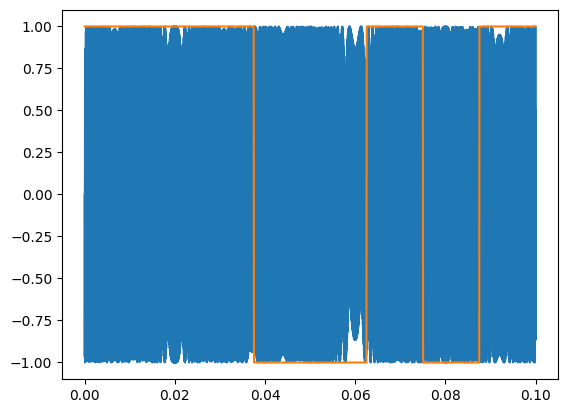

In [137]:
plt.figure()
plt.plot(time_duty,chirp)
plt.plot(time_duty,Modulation)

In [138]:
ModChirp = Modulation*chirp

In [139]:
ModChirp_zero = np.append(ModChirp,np.zeros(int(4*len(time_full)/10)))
ModChirp_zero = np.append(np.zeros(int(len(time_full)/10)),ModChirp_zero)

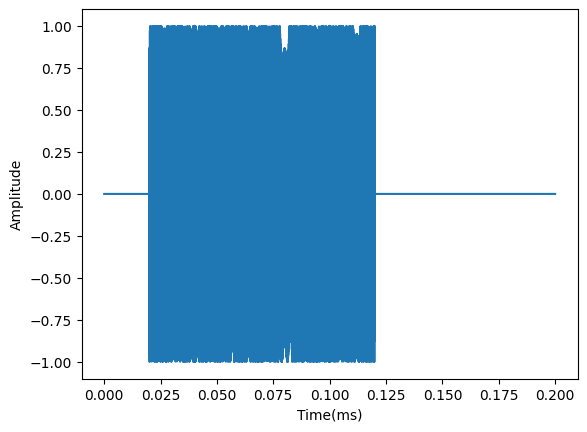

In [145]:
plt.figure()
plt.plot(time_full,ModChirp_zero)
plt.xlabel('Time(ms)')
plt.ylabel('Amplitude')

In [141]:
scaled_ModChirp = np.int16(ModChirp_zero/np.max(np.abs(ModChirp_zero)) * 32767)
wavfile.write('ModulatedChirp_{}SDutyTime_{}kHzTo{}kHz.wav'.format(t1,f0/1000,f1/1000), samplingRate, scaled_ModChirp)